# Project Report on Mini-Project2: RandomVariateGenerator (RandVarGen)
# Users Guide
by: Yogesh Raheja (yraheja3@gatech.edu)

**Objective:** Make a 'nice' library of Random Variate Generation routines in Python from a given U(0,1) number. Random Variate Generator (RandVarGen) exposes a number of methods for generating random numbers drawn from a variety of probability distributions.

RandVarGen has the following properties:
1. Output appears to be i.i.d. Unif(0,1). The probability distributions are derived using NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState").
2. It is fast. The code uses highly-optimized math formula's to minimize resource intensive functions like log(), etc. However, the speed is slower than NumPy's RandomState and [BitGenerator](https://numpy.org/doc/stable/reference/random/generator.html "BitGenerator") by about 10-25%.
3. It has the ability to reproduce any sequence it generates. RandVarGen uses a seed and RandomStates [Mersenne Twister pseudo-random number generator (PRNG)](https://en.wikipedia.org/wiki/Mersenne_Twister "Mersenne Twister") to generate a 'sequence' of required probability distribution.

In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned.

<font
color=green>
### The Code</font>

In [47]:
# Make me a nice library of random variate generation routines.
# You can use your favorite high-level language like C++, Java, Python,
# Matlab, or even Excel. Include in your library routines for generating
# random variates from all of the usual discrete and continuous distributions,
# e.g., Bern(p), Geom(p), Exp(λ), Normal(μ,σ2), Gamma(α,β), Weibull(α,β), etc., etc.
# (Just one routine per distribution is fine.)
# Include in your write-up an easy user’s guide, complete source code,
# and some appropriate examples.

import numpy as np
import math
import operator
import random
from scipy.stats import norm
import scipy.stats as stats
from decimal import Decimal
import matplotlib.pyplot as plt


# Initialising and Defining the class rvg
class RandVarGen:
    def __init__(self, random_no=0):
        self.seed = random_no

# Validating the random number and raising an exception if error
    seed = property(operator.attrgetter('_seed'))

    @seed.setter
    def seed(self, seed):
        # if not ((seed >= 0) and (seed <= 1)):
        if isinstance(seed, (str, list, dict, tuple)):
            raise Exception("Please enter a valid integer as seed")
        if isinstance(seed, float):
            seed = int(seed)
            print("Converted seed to integer")
        if seed == 0:
            print("Considering default seed of 0")
        self._seed = int(seed)

# To generate a single X of a Bernoulli(p) distribution
    def bern(self, p, u):
        if u <= p:
            return 1
        else:
            return 0

# To generate a np.array of X of a Bernoulli(p) distribution
    def bernoulli(self, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.bern(p, unif_no))
        else:
            unif_no = random.random()
            return self.bern(p, unif_no)
        return np.array(out_array)

# To generate X of a Geometric(p) distribution
    def geom(self, p, unif_no):
        return math.ceil(np.log(1-unif_no) / np.log(1-p))

# To generate a np.array of X of a Geometric(p) distribution
    def geometric(self, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.geom(p, unif_no))
        else:
            unif_no = random.random()
            return self.geom(p, unif_no)
        return np.array(out_array)

# To generate X of a Poisson(lambda) distribution
    def pois(self, a_lambda, unif_no):
        lower_bound = 0
        x = 0
        while x > -1:
            fx = Decimal((Decimal(math.e ** -a_lambda) * (2 ** x)) / Decimal(math.factorial(x)))
            Fx = lower_bound + fx
            if lower_bound <= unif_no <= Fx:
                return x
            else:
                x += 1
                lower_bound = Fx

# To generate a np.array of X of a Poisson(lambda) distribution
    def poisson(self, a_lambda, size=None):
        random.seed(self.seed)
        if a_lambda > 2:
            return "Can't process lambda values greater than 2. Please wait for the next version of the library"
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.pois(a_lambda, unif_no))
        else:
            unif_no = random.random()
            return self.pois(a_lambda, unif_no)
        return np.array(out_array)

# To generate X of a Triangular(0,1,2) distribution
    def tria(self, a, b, c, unif_no):
        Fc = (c-a)/(b-a)
        if unif_no < Fc:
            return a + ((b-a) * (c-a) * unif_no) ** 0.5
        else:
            return b - ((b-c) * (b-a) * (1-unif_no)) ** 0.5

# To generate a np.array of X of a Triangular(0, 1, 2) distribution
    def triangular(self, a=0, c=1, b=2, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.tria(a, b, c, unif_no))
        else:
            unif_no = random.random()
            return self.tria(a, b, c, unif_no)
        return np.array(out_array)

# To generate X of a Normal(mu, var) distribution
    def norm(self, mu, var, unif_no):
        return norm.ppf(unif_no, loc=mu, scale=var**0.5)

# To generate a np.array of X of a Normal(mu, var) distribution
    def normal(self, mu=0, var=1, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.norm(mu, var, unif_no))
        else:
            unif_no = random.random()
            return self.norm(mu, var, unif_no)
        return np.array(out_array)

# To generate X of a Weibull(lambda, beta) distribution
    def weib(self, a_lambda, beta, unif_no):
        return (1/a_lambda) * (-np.log(1-unif_no))**(1/beta)

# To generate a np.array of X of a Weibull(lambda, beta) distribution
    def weibull(self, a_lambda, beta, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.weib(a_lambda=a_lambda, beta=beta, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.weib(a_lambda=a_lambda, beta=beta, unif_no=unif_no)
        return np.array(out_array)

# To generate X of an Exponential(lambda) distribution
    def exp(self, a_lambda, unif_no):
        return (-1/a_lambda) * np.log(1-unif_no)

# To generate a np.array of X of an Exponential(lambda) distribution
    def exponential(self, a_lambda, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.exp(a_lambda=a_lambda, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.exp(a_lambda=a_lambda, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Discrete pmf given any x and f(x) values distribution
    def disc(self, x, fx, unif_no):
        lower_bound = 0
        for i in range(len(x)):
            upper_bound = fx[i] + lower_bound
            if lower_bound <= unif_no <= upper_bound:
                return x[i]
            else:
                lower_bound = upper_bound

# To generate a np.array of X of a Discrete pmf given any x and f(x) distribution
    def discrete(self, x, fx, size=None):
        random.seed(self.seed)

        # To check if the input list lengths match
        if len(x) != len(fx):
            return "Input Error: list of x and f(x) have different lenghts"

        # To check if the pmf sums to 1
        if (1-sum(fx)) > 0.000000001:
            return "Input Error: pmf does not add to 1"

        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.disc(x, fx, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.disc(x, fx, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Uniform(a,b) distribution
    def unif(self, a, b, unif_no):
        return a + (b-a) * unif_no

# To generate a np.array of X of a Uniform(a,b) distribution
    def uniform(self, a, b, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.unif(a=a, b=b, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.unif(a=a, b=b, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Discrete Uniform(n) distribution with probability 1/n
    def disc_unif(self, n, unif_no):
        return math.ceil(unif_no * n)

# To generate a np.array of X of a Discrete Uniform(n) distribution with probability 1/n
    def discrete_uniform(self, n, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.disc_unif(n=n, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.disc_unif(n=n, unif_no=unif_no)
        return np.array(out_array)

# To generate a single X of a Binomial(n,p) distribution
    def bin(self, n, p):
        n = math.floor(n)
        return np.sum(np.array(self.bernoulli(p=p, size=n)))

# To generate a np.array of X of a Binomial(n,p) distribution
    def binomial(self, n, p, size=None):
        random.seed(self.seed)
        if size:
            # random.seed(random.random())
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.bin(n=n, p=p))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.bin(n=n, p=p)
        return np.array(out_array)

# To generate a single of X of a Erlang(lambda, n) distribution
    def erl(self, a_lambda, n=1):
        random.seed(self.seed)
        unif_no_product = 1
        for i in range(n):
            unif_no_product *= random.random()
        return (-1/a_lambda) * np.log(unif_no_product)

# To generate a np.array of X of a Erlang(lambda, n) distribution
    def erlang(self, a_lambda, n, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.erl(a_lambda=a_lambda, n=n))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.erl(a_lambda=a_lambda, n=n)
        return np.array(out_array)

# To generate a single of X of a NegBin(n, p) distribution
    def NegBin_single(self, n, p):
        return np.sum(np.array(self.geometric(p=p, size=n)))

# To generate a np.array of X of a NegBin(n, p) distribution
    def negative_binomial(self, n, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.NegBin_single(p=p, n=n))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.NegBin_single(p=p, n=n)
        return np.array(out_array)

# To generate a single of X of a Normal(n, p) distribution
    def chisquare_single(self, n):
        out_value = 0
        for i in range(n):
            out_value += self.normal(mu=0, var=1)**2
        return out_value

# To generate a np.array of X of a Normal(n, p) distribution
    def chisquare(self, ddof, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.chisquare_single(n=ddof))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.chisquare_single(n=ddof)
        return np.array(out_array)


# To plot a derived distribution
def plot_cont_dist(x, title):
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("probability")
    plt.hist(x, bins=100, color="blue")
    plt.show()

<font
color=green>
### RandVarGen().bernoulli()</font>

Draw samples from a bernoulli distribution.

Samples are drawn from a bernoulli distribution with specified parameter, p probability of success where and p is in the interval [0,1].

#### Usage
RandVarGen(_seed=0_).bernoulli(_p, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
p: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0 and <=1

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized bernoulli distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability mass function for the bernoulli distribution is

$
  \begin{equation}
    f(k; p) =
    \begin{cases}
      p, & \text{if}\ k=1 \\
      1-p & \text{if}\ k=0 \\
    \end{cases}
  \end{equation}$

where $p$ is the probability of success, and $k$ is the possible outcomes.

The bernoulli distribution is a special case of the binomial distribution with n=1.

The Bernoulli distributions for ${\displaystyle 0\leq p\leq 1}$ form an exponential family.

The maximum likelihood estimator of ${\displaystyle p}$ based on a random sample is the sample mean.
#### References
1. Wikipedia, "Bernoulli Distribution"
$\quad$ https://en.wikipedia.org/wiki/Bernoulli_distribution

#### Examples

In [48]:
# result of flipping a coin 1 times, tested 100 times.
seed = 12345 #any integer giving the seed for the sequence
p = .5  # number of trials, probability of each trial
s = RandVarGen(seed).bernoulli(p, 100)
print(s)

[1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0]


A real world example.

In a casino game, a dealer deals 1 sets of cards, each with an estimated probability of success of 0.45. The set of cards fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [49]:
sum(RandVarGen(12345).bernoulli(0.45, 20000) == 0)/20000
# answer = 0.5398 or 53.98%

0.5398

#### Visualising the distribution

Considering default seed of 0


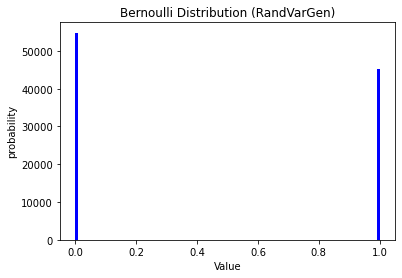

In [50]:
bernoulli_RandVarGen = RandVarGen().bernoulli(0.45,  size=100000)
plot_cont_dist(bernoulli_RandVarGen, 'Bernoulli Distribution (RandVarGen)')

This distribution is not natively available in Numpy [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState"). However, this distribution can easily be tested by glancing on the visualisation above.

<font
color=green>
### RandVarGen().binomial()</font>

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n is an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

#### Usage
RandVarGen(_seed=0_).binomial(_n, p, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
n: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.

$\quad$ $\quad$
p: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0 and <=1

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density for the binomial distribution is

$ P(k) = \binom{n}{k} p^n (1-p)^{n-k} $

where $n$ is the number of trials, $p$ is the probability of success, and $k$ is the number of successes.

When estimating the standard error of a proportion in a population by using a random sample, the normal distribution works well unless the product $p*n <=5$, where p = population proportion estimate, and n = number of samples, in which case the binomial distribution is used instead. For example, a sample of 15 people shows 4 who are left handed, and 11 who are right handed. Then $ p = \frac{4}{15} = 27\% $.
$0.27 * 15 = 4$, so the binomial distribution should be used in this case.

#### References
1. Wikipedia, "Binomial Distribution"
$\quad$ https://en.wikipedia.org/wiki/Binomial_distribution

2. SciPy.org, "numpy.random.binomial"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.binomial.html#numpy.random.binomial

#### Examples

In [51]:
# result of flipping a coin 10 times, tested 100 times.
seed = 12345 #any integer giving the seed for the sequence
n, p = 10, .5  # number of trials, probability of each trial
s = RandVarGen(seed).binomial(n, p, 100)
print(s)

[6 6 4 7 5 2 5 5 6 4 7 8 3 4 4 5 4 5 4 2 7 5 7 4 4 6 7 6 3 2 6 6 4 6 4 8 4
 5 6 3 3 6 5 2 6 4 5 5 5 8 5 6 4 6 7 5 5 4 2 8 3 6 5 5 7 5 6 5 6 1 3 5 3 6
 7 2 4 6 3 3 2 5 4 6 4 7 4 7 5 6 5 7 4 7 2 3 3 5 4 5]


A real world example.

In a casino game, a dealer deals 9 sets of cards, each with an estimated probability of success of 0.25. All nine sets of cards fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [52]:
sum(RandVarGen(12345).binomial(9, 0.25, 20000) == 0)/20000
# answer = 0.0771 or 7.71%

0.0771

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


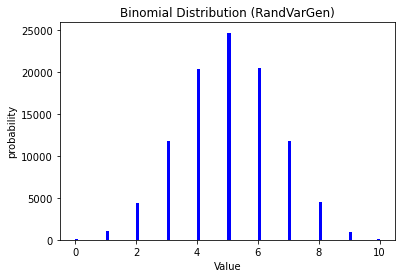

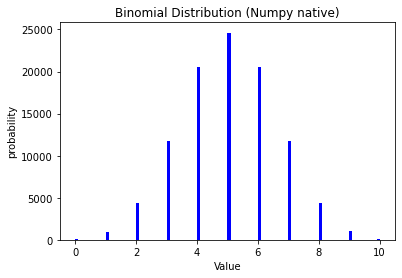

In [53]:
# Comparing Binomial distribution in RandVarGen with Python Native
binomial_RandVarGen = RandVarGen().binomial(10, 0.5,  size=100000)
binomial_native = np.random.binomial(10, 0.5, size=100000)
plot_cont_dist(binomial_RandVarGen, 'Binomial Distribution (RandVarGen)')
plot_cont_dist(binomial_native, 'Binomial Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [91]:
print(stats.chisquare(f_obs=binomial_RandVarGen, f_exp=binomial_native))

Power_divergenceResult(statistic=inf, pvalue=0.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().chisquare()</font>

Calculate a one-way chi-square test.

The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

#### Usage
RandVarGen(_seed=0_).chisquare(_ddof, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
ddof: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
p: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  The p-value of the test. The value is a float if ddof and the return value chisq are scalars.

#### Notes

The default degrees of freedom, k-1, are for the case when no parameters of the distribution are estimated. If p parameters are estimated by efficient maximum likelihood then the correct degrees of freedom are k-1-p. If the parameters are estimated in a different way, then the dof can be between k-1-p and k-1. However, it is also possible that the asymptotic distribution is not chi-square, in which case this test is not appropriate.

#### References
1. Wikipedia, "Chi-Square Distribution"
$\quad$ https://en.wikipedia.org/wiki/Chi-square_distribution

2. SciPy.org, "numpy.random.chisquare"
$\quad$ https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [55]:
RandVarGen(12345).chisquare(5)

17.109845903280558

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


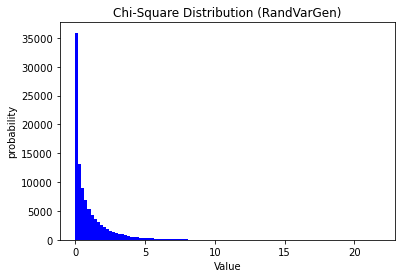

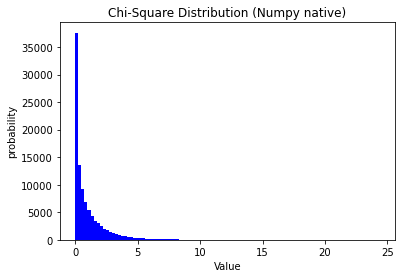

In [56]:
# Comparing Chi-Square distribution in RandVarGen with Python Native
chi_RandVarGen = RandVarGen().chisquare(1, size=100000)
chi_native = np.random.chisquare(1, size=100000)
plot_cont_dist(chi_RandVarGen, 'Chi-Square Distribution (RandVarGen)')
plot_cont_dist(chi_native, 'Chi-Square Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [57]:
print(stats.chisquare(f_obs=chi_RandVarGen, f_exp=chi_native))

Power_divergenceResult(statistic=6841753744.168453, pvalue=0.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.


<font
color=green>
### RandVarGen().discrete()</font>

Draw samples from a less trivial discrete distribution.

Samples are drawn from a discrete distribution with specified parameters, x value of trials and fx is the output value of success where x is a list of floats and fx is the list of corresponding f(x).

#### Usage
RandVarGen(_seed=0_).discrete(_x, fx, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
x: _list of int_ or _list of floats_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, list of input x in the function.

$\quad$ $\quad$
fx: _list of int_ or _list of floats_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, list of output fx of the function.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized discrete distribution, where each sample is equal to the number of successes over _size_ trials.

#### Notes
The probability density for the discrete distribution is

${\displaystyle p_{X}(x_{i})=P(X=x_{i})}$

for ${\displaystyle -\infty <x<\infty }$, where ${\displaystyle P}$ is a probability measure. ${\displaystyle p_{X}(x)}$ can also be simplified as ${\displaystyle p(x)}.$

The probabilities associated with all possible values must be positive and sum up to 1. For all other values, the probabilities need to be 0.

${\displaystyle \sum p_{X}(x_{i})=1}$

${\displaystyle p(x_{i})>0}$

${\displaystyle p(x)=0}$ for all other x

#### References
1. Wikipedia, "Discrete probability distribution"
$\quad$ https://en.wikipedia.org/wiki/Probability_distribution

#### Examples
Suppose we have a discrete pmf

| x | P(X=x) | F(x) | $U$(0,1)'s |
| --- | --- | --- | --- |
| -1 | 0.6 | 0.6 | [0.0, 0.6] |
| 2.5 | 0.3 | 0.9 | (0.6, 0.9] |
| 4 | 0.1 | 1.0 | (0.9, 1.0] |

In [58]:
seed = 12345 #any integer giving the seed for the sequence
x = [-1, 2.5, 4]
fx = [0.6, 0.3, 0.1]
s = RandVarGen(seed).discrete(x, fx, 100)
print(s)

[-1.  -1.   2.5 -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  4.  -1.   4.  -1.  -1.  -1.   2.5 -1.  -1.  -1.  -1.   4.   4.   2.5
 -1.   4.   2.5  2.5 -1.  -1.  -1.   2.5 -1.   2.5 -1.  -1.   2.5  2.5
  2.5 -1.   2.5 -1.   2.5 -1.  -1.  -1.  -1.   4.  -1.  -1.   4.   2.5
 -1.  -1.  -1.  -1.  -1.  -1.   2.5 -1.   4.   4.   2.5  2.5 -1.   2.5
  2.5 -1.  -1.   2.5 -1.   2.5 -1.   4.  -1.   2.5  2.5 -1.  -1.  -1.
  4.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   2.5  2.5 -1.  -1.
 -1.   2.5]


Let’s do 20,000 trials of the above model.

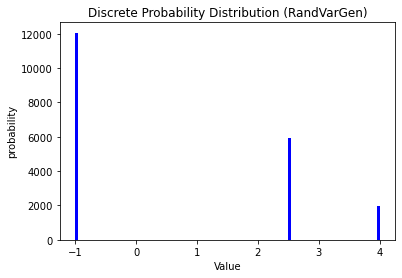

In [59]:
discrete_RandVarGen = RandVarGen(12345).discrete(x, fx, 20000)
plot_cont_dist(discrete_RandVarGen, 'Discrete Probability Distribution (RandVarGen)')

This distribution is not natively available in Numpy [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState"). However, this distribution can easily be tested by glancing on the visualisation above.

<font
color=green>
### RandVarGen().discrete_uniform()</font>

Draw samples from a discrete uniform distribution.

Samples are drawn from a discrete uniform distribution with specified parameters, n where n is the number of elements in the uniform discrete distribution.

#### Usage
RandVarGen(_seed=0_).discrete_uniform(_n, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
n: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, number of outcomes of the uniform distribution

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized discrete uniform distribution, where each sample is equal to the number of successes over _size_ trials.

#### Notes
The probability density for the discrete distribution on {1,2,3,....,n}

$P(X=k) = \frac{1}{n}, \quad \quad 1,2,.....,n$

#### References
1. Wikipedia, "Discrete probability distribution"
$\quad$ https://en.wikipedia.org/wiki/Probability_distribution

#### Examples
Suppose we have to draw the pmf of the outcome of rolling a 10 sided dice.

In [60]:
seed = 12345 #any integer giving the seed for the sequence
n = 10
s = RandVarGen(seed).discrete_uniform(n, 100)
print(s)

[ 5  1  9  3  4  2  6  2  2  5  6  2  6  4 10  1 10  5  6  2  8  2  4  1
  4 10 10  8  1 10  9  8  2  1  5  9  6  8  3  6  8  9  9  3  9  3  9  6
  2  6  6 10  1  2 10  9  2  3  6  2  4  1  8  1 10 10  8  8  4  7  8  5
  1  7  4  7  5 10  3  8  7  6  1  2 10  3  2  3  6  6  1  1  5  2  7  8
  1  6  5  8]


Let’s do 20,000 trials of the above model.

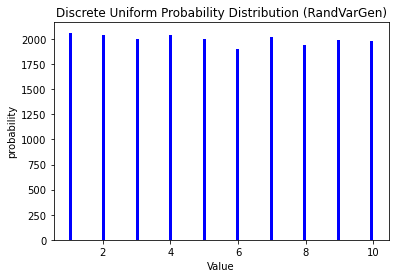

In [61]:
discreteuniform_RandVarGen = RandVarGen(12345).discrete_uniform(n, 20000)
plot_cont_dist(discreteuniform_RandVarGen, 'Discrete Uniform Probability Distribution (RandVarGen)')


This distribution is not natively available in Numpy [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState"). However, this distribution can easily be tested by glancing on the visualisation above.

<font
color=green>
### RandVarGen().erlang()</font>

Draw samples from an erlang distribution.

Samples are drawn from an erlang distribution with specified parameters, lambda value and number of exponentials where lambda is the lambda value of the exponential distribution and n is the number of exponential distributions.

#### Usage
RandVarGen(_seed=0_).erlang(_a_lambda, n, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a_lambda: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, lambda value of the exponential distribution.

$\quad$ $\quad$
n: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, n is the number of exponential distributions that need to be added.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized erlang distribution, where each sample is equal to the number of successes over _size_ trials.

#### Notes
The probability density for the erlang distribution is

$f(x;n,\lambda )={\lambda ^{n}x^{{n-1}}e^{{-\lambda x}} \over (n-1)!}\quad {\mbox{for }}x, \lambda \geq 0,$

The parameter n is called the shape parameter, and the parameter ${\displaystyle \lambda }$ is called the rate parameter.

Erlang-distributed random variates can be generated from uniformly distributed random numbers $({\displaystyle U\in (0,1]})$ using the following formula:

${\displaystyle E(k,\lambda )=-{\frac {1}{\lambda }}\ln \prod _{i=1}^{k}U_{i}}$

#### References
1. Wikipedia, "Erlang distribution"
$\quad$ https://en.wikipedia.org/wiki/Erlang_distribution

#### Examples

The Erlang distribution, which measures the time between incoming calls, can be used in conjunction with the expected duration of incoming calls to produce information about the traffic load measured in erlangs. This can be used to determine the probability of packet loss or delay, according to various assumptions made about whether blocked calls are aborted (Erlang B formula) or queued until served (Erlang C formula). The Erlang-B and C formulae are still in everyday use for traffic modeling for applications such as the design of call centers.

In [62]:
seed = 12345 #any integer giving the seed for the sequence
a_lambda = 1
n = 2
s = RandVarGen(seed).erlang(a_lambda, n, 100)
print(s)

[7.40109211 1.37014426 1.1088041  2.43568669 2.54330992 2.45253089
 1.75360282 1.43119839 0.69801315 2.10410461 1.76640318 0.15197566
 3.92760888 4.9238729  2.65932025 1.66645607 2.30005974 1.49405873
 3.27441331 1.12956565 4.45209016 0.2768294  1.12072887 1.19747987
 0.5581331  0.30125474 0.4745796  3.6845664  1.27394507 0.74972743
 0.3880723  1.04762284 2.81159    2.3132696  1.42490399 4.18806522
 1.43544451 1.02188517 1.24229872 2.1497289  0.68428322 1.61497075
 4.46362739 2.54646035 1.81820728 0.74961198 0.78960465 0.25500613
 1.03539221 0.98709389 0.97233851 3.57513956 1.80899297 8.20668142
 1.12675013 0.95252602 2.04229986 1.76840461 1.66635826 1.1863747
 7.93872682 0.79669137 2.38112371 1.25272992 0.98377358 1.9974881
 0.69198713 4.82322013 3.17415214 3.86181845 1.80253435 2.37104269
 0.60702643 1.5642885  2.21068867 2.73924795 1.61211713 2.42518028
 3.361847   0.98620364 1.18329914 1.10181019 2.38155643 0.56386311
 1.91002512 0.08677373 2.11747206 3.37189558 0.34744547 4.952495

Let’s do 20,000 trials of the above model.

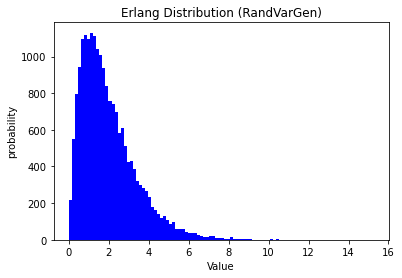

In [63]:
erlang_RandVarGen = RandVarGen(12345).erlang(a_lambda, n, 20000)
plot_cont_dist(erlang_RandVarGen, 'Erlang Distribution (RandVarGen)')

This distribution is not natively available in Numpy [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState"). However, this distribution can easily be tested by glancing on the visualisation above.

<font
color=green>
### RandVarGen().exponential()</font>

Draw samples from an exponential distribution.

Samples are drawn from an exponential distribution with specified parameters, lambda where lambda is the rate of the exponential distribution.

#### Usage
RandVarGen(_seed=0_).exponential(_a_lambda, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a_lambda: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter rate of the distribution. Must be > 0.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized exponential distribution.

#### Notes

The probability density function (pdf) of an exponential distribution is

${\displaystyle f(x;\lambda ) = {\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}}$

Here λ > 0 is the parameter of the distribution, often called the rate parameter. The distribution is supported on the interval [0, ∞). If a random variable X has this distribution, we write X ~ Exp(λ).
#### References
1. Wikipedia, "Exponential Distribution"
$\quad$ https://en.wikipedia.org/wiki/Exponential_distribution

2. SciPy.org, "numpy.random.exponential"
$\quad$ https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

#### Examples

In [64]:
# result of flipping a coin 10 times, tested 100 times.
seed = 12345 # any integer giving the seed for the sequence
a_lambda = 4  # rate of the exponential distribution
s = RandVarGen(seed).exponential(a_lambda, 25)
print(s)

[0.13472907 0.00255531 0.43603751 0.08868344 0.11487938 0.05381287
 0.20868239 0.04409118 0.03317347 0.14182089 0.2064289  0.04789413
 0.20142285 0.10958802 0.79290734 0.02393344 0.96155876 0.13280785
 0.17526226 0.04008508 0.31732092 0.05267142 0.10447063 0.00595056
 0.10369627]


#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


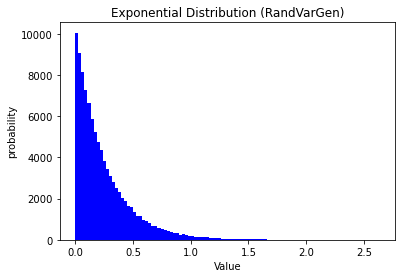

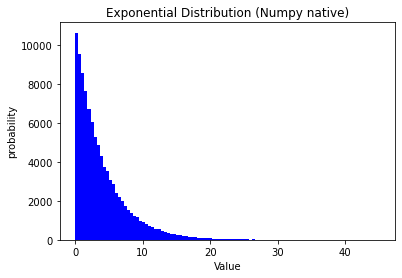

In [65]:
# Comparing Exponential distribution in RandVarGen with Python Native
exponential_RandVarGen = RandVarGen().exponential(4,  size=100000)
exponential_native = np.random.exponential(4, size=100000)
plot_cont_dist(exponential_RandVarGen, 'Exponential Distribution (RandVarGen)')
plot_cont_dist(exponential_native, 'Exponential Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [66]:
print(stats.chisquare(f_obs=exponential_RandVarGen, f_exp=exponential_native))

Power_divergenceResult(statistic=425389.52710586425, pvalue=0.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().geometric()</font>

Draw samples from a gometric distribution.

Samples are drawn from a geometric distribution with specified parameters, p probability of success where p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

#### Usage
RandVarGen(_seed=0_).geometric(_p, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
p: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0 and <=1

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized geometric distribution.

#### Notes
Bernoulli trials are experiments with one of two outcomes: success or failure (an example of such an experiment is flipping a coin). The geometric distribution models the number of trials that must be run in order to achieve success. It is therefore supported on the positive integers, k = 1, 2, ....

The probability mass function of the geometric distribution is

$f(k) = (1 - p)^{k - 1} p$

where p is the probability of success of an individual trial.

#### References
1. Wikipedia, "Geometric Distribution"
$\quad$ https://en.wikipedia.org/wiki/Geometric_distribution

2. SciPy.org, "numpy.random.geometric"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.geometric.html#numpy.random.geometric

#### Examples
Draw from the geometric distribution, with the probability of an individual success equal to 0.35:

In [67]:
seed = 12345 #any integer giving the seed for the sequence
p = .35  # number of trials, probability of each trial
s = RandVarGen(seed).geometric(p, 100)
print(s)

[ 2  1  5  1  2  1  2  1  1  2  2  1  2  2  8  1  9  2  2  1  3  1  1  1
  1  8  9  4  1  7  5  4  1  1  2  6  3  4  1  2  3  5  4  1  5  1  4  2
  1  3  2  8  1  1 10  5  1  1  2  1  1  1  3  1 13  6  4  4  2  3  4  2
  1  3  1  3  2  8  1  4  3  2  1  1  8  1  1  1  2  2  1  1  2  1  3  4
  1  2  2  4]


A real world example.

Counting the number of dice tosses until a 3 (or any particular number) comes up, where the Bern(1/6) trials are the i.i.d. dice tosses.
Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [68]:
sum(RandVarGen(12345).geometric(p, 20000) == 1)/20000
# answer = 0.35805 or 35.805%

0.35805

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


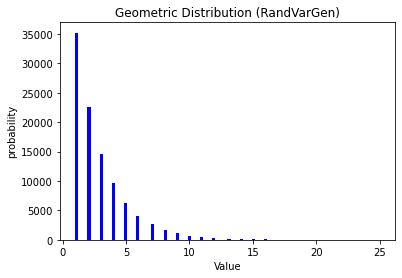

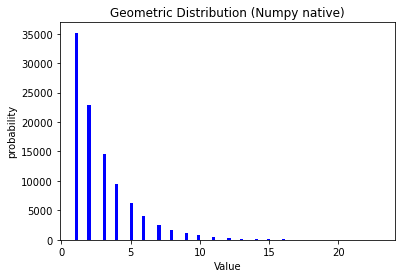

In [69]:
# Comparing Geometric distribution in RandVarGen with Python Native
geometric_RandVarGen = RandVarGen().geometric(0.35,  size=100000)
geometric_native = np.random.geometric(0.35, size=100000)
plot_cont_dist(geometric_RandVarGen, 'Geometric Distribution (RandVarGen)')
plot_cont_dist(geometric_native, 'Geometric Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [70]:
print(stats.chisquare(f_obs=geometric_RandVarGen, f_exp=geometric_native))

Power_divergenceResult(statistic=474694.6139896055, pvalue=0.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().negative_binomial()</font>

Draw samples from a negative binomial distribution.

Samples are drawn from a negative binomial distribution with specified parameters, n successes and p probability of success where n is an integer > 0 and p is in the interval [0, 1].
#### Usage
RandVarGen(_seed=0_).negative_binomial(_n, p, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
n: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, > 0. Floats are also accepted, but they will be truncated to integers.

$\quad$ $\quad$
p: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0 and <=1

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized negative binomial distribution, where each sample is equal to N, the number of failures that occurred before a total of n successes was reached.

#### Notes
The probability mass function of the negative binomial distribution is

${\displaystyle f(k;r,p)\equiv \Pr(X=k)={\binom {k+r-1}{r-1}}(1-p)^{k}p^{r}}$

where r is the number of successes, k is the number of failures, and p is the probability of success.
#### References
1. Wikipedia, "Negative Binomial Distribution"
$\quad$ https://en.wikipedia.org/wiki/Negative_binomial_distribution#:~:text=In%20probability%20theory%20and%20statistics,failures%20(denoted%20r)%20occurs.

2. SciPy.org, "numpy.random.negative_binomial"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.negative_binomial.html#numpy.random.negative_binomial
#### Examples

In [71]:
# result of flipping a coin 10 times, tested 100 times.
seed = 12345 #any integer giving the seed for the sequence
n, p = 10, .5  # number of trials, probability of each trial
s = RandVarGen(seed).negative_binomial(n, p, 100)
print(s)

[18 17 23 18 16 28 22 20 19 20 17 15 31 22 23 24 23 17 22 24 19 18 18 24
 27 18 16 18 25 26 18 20 27 18 17 13 22 19 15 23 22 20 21 28 17 23 22 19
 22 12 20 22 21 17 14 22 17 21 22 12 36 17 21 17 19 20 16 25 15 33 20 17
 28 23 22 23 23 17 20 22 29 26 16 16 18 16 23 13 19 15 21 17 18 14 24 33
 20 16 21 19]


A real world example.

A company drills wild-cat oil exploration wells, each with an estimated probability of success of 0.25. What is the probability of having one success for each successive well, that is what is the probability of a single success after drilling 2 wells?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [72]:
sum(RandVarGen(12345).negative_binomial(2, 0.25, 20000) <3)/20000
# answer = 0.0608 or 6.08%

0.0608

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


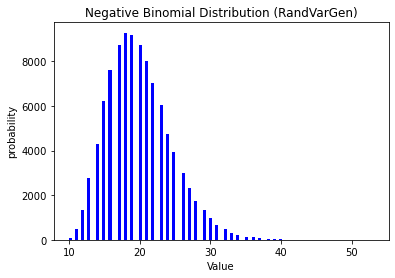

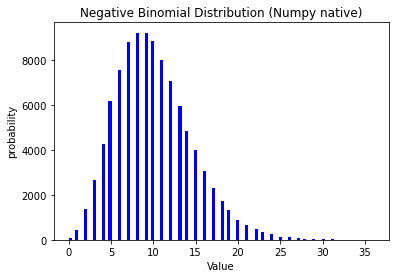

In [73]:
# Comparing Negative Binomial distribution in RandVarGen with Python Native
negative_binomial_RandVarGen = RandVarGen().negative_binomial(10, 0.5,  size=100000)
negative_binomial_native = np.random.negative_binomial(10, 0.5, size=100000)
plot_cont_dist(negative_binomial_RandVarGen, 'Negative Binomial Distribution (RandVarGen)')
plot_cont_dist(negative_binomial_native, 'Negative Binomial Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [74]:
print(stats.chisquare(f_obs=negative_binomial_RandVarGen, f_exp=negative_binomial_native))

Power_divergenceResult(statistic=inf, pvalue=0.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().normal()</font>

Draw samples from a normal distribution.

Samples are drawn from a normal distribution with specified parameters, _mu_ and _var_ where _mu_ and _var_ are floats on the real line.

#### Usage
RandVarGen(_seed=0_).normal(_mu=0, var=1, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
mu: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, mean (“centre”) of the distribution.

$\quad$ $\quad$
var: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, variance (spread or “width”) of the distribution.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized normal distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density for the normal distribution is

$ {\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $

The parameter ${\displaystyle \mu }$  is the mean or expectation of the distribution (and also its median and mode), while the parameter ${\displaystyle \sigma }$  is its standard deviation. The square of the standard deviation, $\sigma^2$, is called the variance

The function has its peak at the mean, and its “spread” increases with the standard deviation (the function reaches 0.607 times its maximum at $x + \sigma$ and $x - \sigma$). This implies that RandVarGen is more likely to return samples lying close to the mean, rather than those far away.

#### References
1. Wikipedia, "Normal Distribution"
$\quad$ https://en.wikipedia.org/wiki/Normal_distribution

2. SciPy.org, "numpy.random.normal"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy.random.normal

#### Examples

In [75]:
seed = 12345 #any integer giving the seed for the sequence
mu, var = 3, 2  # center of distribution, variance of the distribution
s = RandVarGen(seed).normal(mu, var, 100)
print(s)

[ 2.70223971 -0.28104183  4.32284223  2.2528477   2.52473518  1.77743663
  3.23507086  1.6034008   1.36811344  2.76113436  3.22095821  1.67468548
  3.18922696  2.47374146  5.44469074  1.11509632  5.86581488  2.68590816
  3.01395074  1.52297081  3.81992701  1.75831799  2.42270647  0.19148791
  2.41482732  5.6092479   5.87020616  3.92966843 -0.82005709  5.2016178
  4.59809543  4.04877705  1.69939642  1.18357291  2.69466991  4.70147893
  3.27859934  3.89497646  1.9672817   3.08370008  3.78007053  4.32079812
  4.22661642  1.96583262  4.61446708  1.89058341  4.19985363  3.19589697
  1.73657784  3.31673756  3.06467948  5.45418616  0.54903083  1.6174773
  6.00812399  4.36176732  1.53591347  1.95097703  3.13896488  1.57596606
  2.35341005  0.66443965  3.78954328  0.99916269  6.60536621  4.99250661
  4.13471448  4.0561255   2.52226119  3.65631371  4.00459722  2.9318272
  0.81914592  3.45474322  2.36127147  3.39534509  2.71747615  5.36160035
  1.81780376  4.03956825  3.73577109  3.20118716  1.01

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


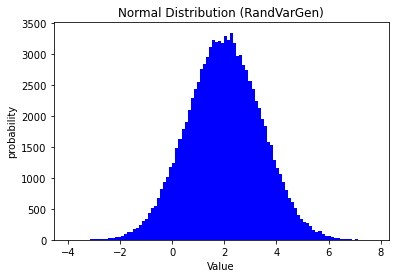

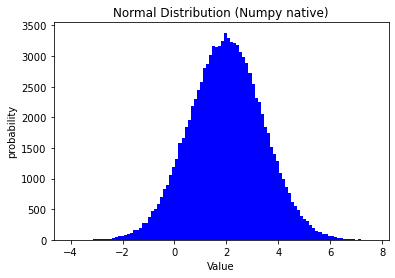

In [76]:
# Comparing Normal distribution in RandVarGen with Python Native
normal_RandVarGen = RandVarGen().normal(2, 2,  size=100000)
normal_native = np.random.normal(2, 2**0.5, size=100000)
plot_cont_dist(normal_RandVarGen, 'Normal Distribution (RandVarGen)')
plot_cont_dist(normal_native, 'Normal Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [96]:
print(stats.chisquare(f_obs=normal_RandVarGen, f_exp=normal_native))

Power_divergenceResult(statistic=-29164.530171182632, pvalue=1.0)


Since the p-value (=0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().poisson()</font>

Draw samples from a poisson distribution.

The Poisson distribution is the limit of the binomial distribution for large N.

#### Usage
RandVarGen(_seed=0_).poisson(_a_lambda, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a_lambda: _float_

$\quad$ $\quad$ $\quad$ $\quad$ Expectation of interval, should be >= 0. A sequence of expectation intervals must be broadcastable over the requested size.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized poisson distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density for the poisson distribution is

$ \!f(k; \lambda)= \Pr(X{=}k)= \frac{\lambda^k e^{-\lambda}}{k!}, $

where,
k is the number of occurrences (${\displaystyle k=0,1,2...}$)

The Poisson distribution can be applied to systems with a large number of possible events, each of which is rare. The number of such events that occur during a fixed time interval is, under the right circumstances, a random number with a Poisson distribution.

#### References
1. Wikipedia, "Poisson Distribution"
$\quad$ https://en.wikipedia.org/wiki/Poisson_distribution

2. SciPy.org, "numpy.random.poisson"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.poisson.html#numpy.random.poisson

#### Examples

In [78]:
# result of flipping a coin 10 times, tested 100 times.
seed = 12345 #any integer giving the seed for the sequence
lamb = 2  # number of trials, probability of each trial
s = RandVarGen(seed).poisson(lamb, 100)
print(s)

[2 0 3 1 1 1 2 1 0 2 2 1 2 1 5 0 5 2 2 1 3 1 1 0 1 5 5 3 0 4 4 3 1 0 2 4 2
 3 1 2 3 3 3 1 4 1 3 2 1 2 2 5 0 1 5 3 1 1 2 1 1 0 3 0 6 4 3 3 1 3 3 2 0 2
 1 2 2 5 1 3 3 2 0 1 5 1 1 1 2 2 0 0 2 1 2 3 0 2 2 3]


A real world example.

The number of patients arriving in an emergency room between 10 and 11 pm can be expressed as Pois(2).

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


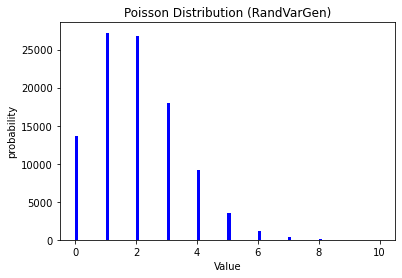

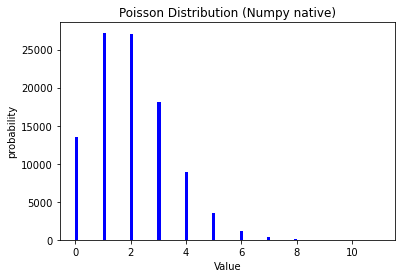

In [79]:
# Comparing Poisson distribution in RandVarGen with Python Native
poisson_RandVarGen = RandVarGen().poisson(2,  size=100000)
poisson_native = np.random.poisson(2, size=100000)
plot_cont_dist(poisson_RandVarGen, 'Poisson Distribution (RandVarGen)')
plot_cont_dist(poisson_native, 'Poisson Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [97]:
print(stats.chisquare(f_obs=poisson_RandVarGen, f_exp=poisson_native))

Power_divergenceResult(statistic=nan, pvalue=nan)


Since the p-value (~0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().triangular()</font>

Draw samples from a triangular distribution.

Samples are drawn from a triangular distribution, a continuous probability distribution with lower limit a, upper limit b and mode c, where a < b and a ≤ c ≤ b.

#### Usage
RandVarGen(_seed=0_).triangular(_a=0, b=2, c=1, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a: _int or float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, lower limit a, where a<=c<=b

$\quad$ $\quad$
b: _int or float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, upper limit b, where a<=c<=b.

$\quad$ $\quad$
c: _int or float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, mode c, where a<=c<=b


$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized triangular distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
Given a random variate U drawn from the uniform distribution in the interval (0, 1), then the variate

${\displaystyle X={\begin{cases}a+{\sqrt {U(b-a)(c-a)}}&{\text{ for }}0<U<F(c)\\&\\b-{\sqrt {(1-U)(b-a)(b-c)}}&{\text{ for }}F(c)\leq U<1\end{cases}}}$

where ${\displaystyle F(c)=(c-a)/(b-a)}$, has a triangular distribution with parameters ${\displaystyle a,b}$ and ${\displaystyle c}$. This can be obtained from the cumulative distribution function.

The triangular distribution is typically used as a subjective description of a population for which there is only limited sample data, and especially in cases where the relationship between variables is known but data is scarce (possibly because of the high cost of collection). It is based on a knowledge of the minimum and maximum and an "inspired guess" as to the modal value. For these reasons, the triangle distribution has been called a "lack of knowledge" distribution.

#### References
1. Wikipedia, "Triangular Distribution"
$\quad$ https://en.wikipedia.org/wiki/Triangular_distribution

2. SciPy.org, "numpy.random.triangular"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.triangular.html#numpy.random.triangular

#### Examples

In [81]:
seed = 12345 #any integer giving the seed for the sequence
a,c,b = 0,1,2  # left, mode, right of the distribution
s = RandVarGen(seed).triangular(a,c,b, 100)
print(s)

[0.91281967 0.14261255 1.40874119 0.77283874 0.85838417 0.62235255
 1.06834359 0.56866128 0.49853161 0.93052272 1.06413515 0.59049735
 1.05471812 0.84249794 1.71039608 0.4273034  1.79331181 0.90787597
 1.00394314 0.54432742 1.25028958 0.61639497 0.82651125 0.21689268
 0.82403613 1.74498023 1.79407989 1.28519938 0.08312173 1.65427902
 1.49160442 1.32299828 0.59812    0.44609334 0.91053003 1.52153677
 1.08139892 1.2741656  0.68208666 1.02388277 1.23761747 1.40811141
 1.37891149 0.68162763 1.49639295 0.65784562 1.37055459 1.05669231
 0.60963655 1.09292626 1.01840883 1.71246741 0.28823331 0.57295424
 1.81720314 1.4206985  0.54821978 0.67692388 1.03993571 0.56032282
 0.80468718 0.31406758 1.24062828 0.39639058 1.89611786 1.60142714
 1.35012135 1.32532362 0.85761565 1.19838435 1.30899894 0.98058784
 0.35078497 1.13525027 0.80716892 1.11692477 0.91741862 1.69187919
 0.63497184 1.3200829  1.22354891 1.05826012 0.40011568 0.5743722
 1.7441953  0.67917969 0.57191438 0.75933612 1.03783632 1.01980

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


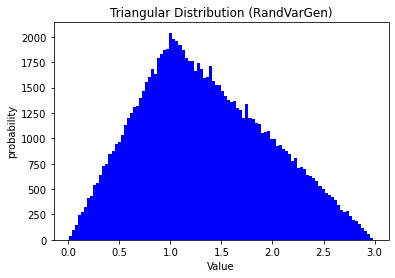

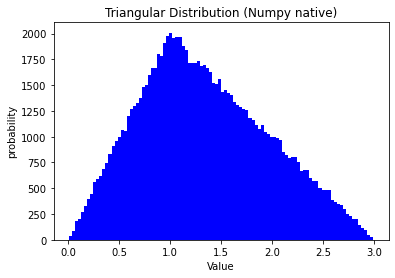

In [82]:
# Comparing Triangular distribution in RandVarGen with Python Native
triangular_RandVarGen = RandVarGen().triangular(0, 1, 3, size=100000)
triangular_native = np.random.triangular(0, 1, 3, size=100000)
plot_cont_dist(triangular_RandVarGen, 'Triangular Distribution (RandVarGen)')
plot_cont_dist(triangular_native, 'Triangular Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [83]:
print(stats.chisquare(f_obs=triangular_RandVarGen, f_exp=triangular_native))

Power_divergenceResult(statistic=105305.332354597, pvalue=9.819394064886497e-32)


Since the p-value (~0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().uniform()</font>

Draw samples from a uniform distribution.

Samples are drawn from a uniform distribution with specified parameters, lower bound a and upper bound b where a, b are any numeric number and a<=b

#### Usage
RandVarGen(_seed=0_).uniform(_a=0, b=1, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, lower bound a, where a<=b

$\quad$ $\quad$
b: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, upper bound a, where a<=b

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized uniform distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density function of the continuous uniform distribution is:

${\displaystyle f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}}$

The values of f(x) at the two boundaries a and b are usually unimportant because they do not alter the values of the integrals of f(x) dx over any interval, nor of x f(x) dx or any higher moment.
#### References
1. Wikipedia, "Uniform Distribution"
$\quad$ https://en.wikipedia.org/wiki/Continuous_uniform_distribution

2. SciPy.org, "numpy.random.binomial"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html#numpy.random.uniform

#### Examples

In [84]:
seed = 12345 #any integer giving the seed for the sequence
a, b = 1, 10  # lower bound, upper bound
s = RandVarGen(seed).uniform(a, b, 100)
print(s)

[4.74957885 1.09152253 8.42685858 3.6877587  4.31570521 2.74295214
 6.09407352 2.45519042 2.11840196 4.89642641 6.05870639 2.56909205
 5.97898977 4.19411248 9.62258307 1.82164689 9.80775996 4.70907454
 5.53541831 2.33331552 7.47070426 2.70974241 4.07404383 1.21169096
 4.05565995 9.70734213 9.80918609 7.70077036 1.0310915  9.46214653
 8.83690272 7.93750905 2.60986388 1.8954967  4.73079222 8.9698282
 6.20277425 7.62923993 3.09358993 5.71237822 7.38447794 8.42350552
 8.2641208  3.09077302 8.8587097  2.94742387 8.21709314 5.99576769
 2.67245524 6.29747756 5.66415447 9.62796253 1.373853   2.47724454
 9.84963388 8.48984397 2.35245219 3.06201673 5.85224447 2.41282747
 3.91384653 1.44387301 7.40509564 1.70706472 9.95143826 9.28512855
 8.09945985 7.95165301 4.3097707  7.10835556 7.8513289  5.32698629
 1.55372542 6.63493554 3.93184749 6.49080164 4.78745615 9.57277705
 2.81435155 7.9197073  7.2870567  6.00906699 1.7204165  2.4845654
 9.7055378  3.07578276 2.47188729 3.59466105 5.83408476 5.676520

In [85]:
sum(RandVarGen(12345).uniform(0, 10, 20000))/20000
# answer = 4.959

4.959315671418217

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


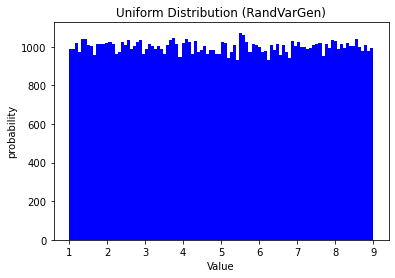

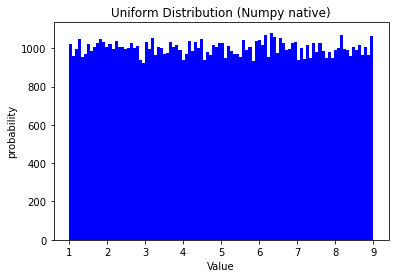

In [86]:
# Comparing Uniform distribution in RandVarGen with Python Native
uniform_RandVarGen = RandVarGen().uniform(1, 9,  size=100000)
uniform_native = np.random.uniform(1, 9, size=100000)
plot_cont_dist(uniform_RandVarGen, 'Uniform Distribution (RandVarGen)')
plot_cont_dist(uniform_native, 'Uniform Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.

In [87]:
print(stats.chisquare(f_obs=uniform_RandVarGen, f_exp=uniform_native))

Power_divergenceResult(statistic=333456.2427345918, pvalue=0.0)


Since the p-value (~0.0) is less than 0.05, we accept the null hypothesis. This means we have sufficient evidence to say that the true distribution of RandVarGen distribution generator follows from that generated by Numpy Native.

<font
color=green>
### RandVarGen().weibull()</font>

Draw samples from a weibull distribution.

Samples are drawn from a 2-parameter weibull distribution with specified parameters, lambda and beta where lambda and beta are floats.

#### Usage
RandVarGen(_seed=0_).weibull(_a_lambda, beta, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
a_lambda: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution.

$\quad$ $\quad$
beta: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution.

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized weibull distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density function of a Weibull random variable is:

${\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}\mathrm {e} ^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$

#### References
1. Wikipedia, "Weibull Distribution"
$\quad$ https://en.wikipedia.org/wiki/Weibull_distribution

2. SciPy.org, "numpy.random.weibull"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.weibull.html#numpy.random.weibull

#### Examples

In [88]:
seed = 12345 #any integer giving the seed for the sequence
a_lambda, beta = 1, 2  # number of trials, probability of each trial
s = RandVarGen(seed).weibull(a_lambda, beta, 100)
print(s)

[0.73410918 0.10110009 1.32066273 0.5955953  0.6778772  0.463952
 0.91363536 0.419958   0.36427173 0.7531823  0.90868894 0.43769456
 0.89760314 0.66208163 1.78090689 0.30940876 1.96118206 0.72885623
 0.83728672 0.40042518 1.12662491 0.45900512 0.64643834 0.1542798
 0.64403809 1.85093912 1.96307952 1.16818254 0.05882679 1.67850937
 1.43043282 1.21379987 0.44393516 0.32373555 0.73167243 1.47224285
 0.92895309 1.15499523 0.51456253 0.86109951 1.11164781 1.31985639
 1.2828525  0.51416614 1.43703344 0.49379309 1.27239124 0.89992927
 0.4534138  0.94244907 0.85458056 1.78493285 0.20597727 0.42342897
 2.02284619 1.33604326 0.4035338  0.5101112  0.88014614 0.41323792
 0.62546647 0.22489318 1.11520174 0.286043   2.28520105 1.59150153
 1.24703105 1.21663119 0.67710711 1.06555114 1.19681871 0.80958037
 0.2519903  0.99185556 0.6278299  0.97048285 0.73902407 1.74575882
 0.47448795 1.21025451 1.09507554 0.90177577 0.28884583 0.42457711
 1.84927802 0.51205426 0.42258751 0.58317469 0.87766086 0.8562499

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


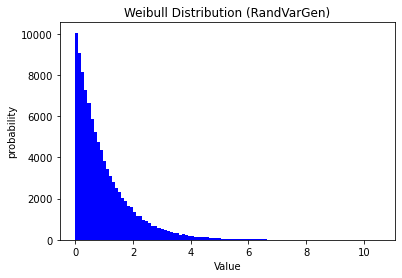

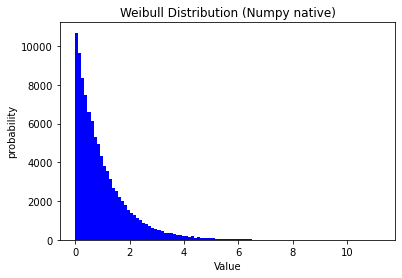

In [89]:
# Comparing Weibull distribution in RandVarGen with Python Native
weibull_RandVarGen = RandVarGen().weibull(1, 1,  size=100000)
weibull_native = np.random.weibull(1, size=100000)
plot_cont_dist(weibull_RandVarGen, 'Weibull Distribution (RandVarGen)')
plot_cont_dist(weibull_native, 'Weibull Distribution (Numpy native)')

#### Testing
$H_0$: (null hypothesis) A variable follows a hypothesized distribution.

$H_1$: (alternative hypothesis) A variable does not follow a hypothesized distribution.

A Chi-Square Goodness of Fit Test is used to determine whether or not a categorical variable follows a hypothesized distribution.


In [90]:
print(stats.chisquare(f_obs=weibull_RandVarGen, f_exp=weibull_native))

Power_divergenceResult(statistic=2777695.447099648, pvalue=0.0)


Since the p-value (~0.0) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the true distribution of Numpy Native is different from that generated by RandVarGen distribution generator.